In [2]:
import pandas as pd

In [3]:
#뉴스검색 >> 네이버 뉴스 연계 오류 체크

In [4]:
#서울시 반려동물 입양정보

In [5]:
import pandas as pd
from charset_normalizer import from_path

def read_csv_auto(filepath, **kwargs):
    """
    CSV 파일의 인코딩을 자동으로 감지해 pandas DataFrame으로 불러오는 함수

    Parameters:
        filepath (str): CSV 파일 경로
        **kwargs: pd.read_csv()의 추가 옵션 (예: sep, header 등)

    Returns:
        df (pd.DataFrame): 읽어온 데이터프레임
    """

    # 1️⃣ 인코딩 자동 감지
    result = from_path(filepath).best()
    detected_encoding = result.encoding

    print(f"🔍 감지된 인코딩: {detected_encoding}")

    # 2️⃣ 감지된 인코딩으로 CSV 읽기
    try:
        df = pd.read_csv(filepath, encoding=detected_encoding, **kwargs)
    except UnicodeDecodeError:
        print("⚠️ 인코딩 감지 실패 또는 부분 오류 발생. cp949로 재시도합니다.")
        df = pd.read_csv(filepath, encoding='cp949', **kwargs)

    return df

In [6]:
info = read_csv_auto('data/서울동물복지지원센터 반려동물 입양 정보.csv')
import re
pattern = r'[^가-힣]+'
info['소개내용']=info['소개내용'].apply(lambda x:re.sub(pattern,' ',x))
info2 = info[['동물 고유번호','이름','종','성별','출생년도','체중','입양상태','임시보호상태','입소날짜','소개내용']]
info2.head()

🔍 감지된 인코딩: utf_8


,동물 고유번호,이름,종,성별,출생년도,체중,입양상태,임시보호상태,입소날짜,소개내용
0,62,경자,DOG,W,2021-01-11,5.59,입양문의가능,임시보호가능,2024-01-11,이름처럼 순박하고 맑은 아이 경자예요 이름 경자 성별 암컷 중성화 수술 완료 나이...
1,47,순금,DOG,M,2020-06-28,4.19,입양문의가능,임시보호가능,2023-07-20,똥꼬발랄 명랑 쾌활한 흰구름 강아지 순금 이름 순금 성별 수컷 중성화 수술 완료 ...
2,59,정금,DOG,W,2020-07-08,4.50,입양진행중,임시보호중,2023-09-14,무조건 당신에게 충성 충성 사랑합니다 정금이 이름 정금 성별 암컷 중성화 수술 완...
3,56,버터,DOG,W,2010-06-10,3.12,미표출,임시보호중,2022-06-10,밥 때만은 놓치지 않을꺼예요 버터 공주님 이름 버터 성별 암컷 중성화 수술 완료 ...
4,123,찰리,DOG,M,2023-01-21,8.16,입양문의가능,임시보호가능,2024-10-28,근엄 진지하게 생겼지만 나는야 사랑에 목마른 애교 둥이 강아지 찰리랍니다 이름 찰...


In [7]:
picture = read_csv_auto('data/서울동물복지지원센터 반려동물 입양 사진.csv')
picture2 = picture[['동물 고유번호', '사진url']]
picture2_first = picture2.drop_duplicates(subset='동물 고유번호', keep='first')
picture2_first.head()

🔍 감지된 인코딩: utf_8


,동물 고유번호,사진url
0,62,https://func.seoul.go.kr/upload/animal/202504/...
1,47,https://func.seoul.go.kr/upload/animal/202505/...
2,59,https://func.seoul.go.kr/upload/animal/202504/...
3,56,https://func.seoul.go.kr/upload/animal/202505/...
4,123,https://func.seoul.go.kr/upload/animal/202509/...


In [8]:
merge = info2.merge(picture2_first, on='동물 고유번호')
merge.head()

,동물 고유번호,이름,종,성별,출생년도,체중,입양상태,임시보호상태,입소날짜,소개내용,사진url
0,62,경자,DOG,W,2021-01-11,5.59,입양문의가능,임시보호가능,2024-01-11,이름처럼 순박하고 맑은 아이 경자예요 이름 경자 성별 암컷 중성화 수술 완료 나이...,https://func.seoul.go.kr/upload/animal/202504/...
1,47,순금,DOG,M,2020-06-28,4.19,입양문의가능,임시보호가능,2023-07-20,똥꼬발랄 명랑 쾌활한 흰구름 강아지 순금 이름 순금 성별 수컷 중성화 수술 완료 ...,https://func.seoul.go.kr/upload/animal/202505/...
2,59,정금,DOG,W,2020-07-08,4.50,입양진행중,임시보호중,2023-09-14,무조건 당신에게 충성 충성 사랑합니다 정금이 이름 정금 성별 암컷 중성화 수술 완...,https://func.seoul.go.kr/upload/animal/202504/...
3,56,버터,DOG,W,2010-06-10,3.12,미표출,임시보호중,2022-06-10,밥 때만은 놓치지 않을꺼예요 버터 공주님 이름 버터 성별 암컷 중성화 수술 완료 ...,https://func.seoul.go.kr/upload/animal/202505/...
4,123,찰리,DOG,M,2023-01-21,8.16,입양문의가능,임시보호가능,2024-10-28,근엄 진지하게 생겼지만 나는야 사랑에 목마른 애교 둥이 강아지 찰리랍니다 이름 찰...,https://func.seoul.go.kr/upload/animal/202509/...


In [9]:
#유기동물보호현황(동물별/기간별추이)

In [14]:
df = pd.read_csv('data/유기동물보호+현황_20251010181858.csv')
df2 = df[['현황별(2)','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022','2023']]
df2.set_index('현황별(2)', inplace=True)
df2

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
현황별(2),,,,,,,,,,,
소계,11672,9551,8902,8645,8630,8220,7515,6378,5605,4870,5176
개,7803,6644,6060,5872,5584,5368,4533,3422,2784,2491,2428
고양이,3509,2616,2541,2433,2758,2607,2726,2658,2526,2134,2307
기타,360,291,301,340,288,245,256,298,295,245,441


C:\Users\AIPM\AppData\Local\Temp\ipykernel_7240\2776064649.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(years[idx],dogs[idx]+5,d, ha='center', size=10)
C:\Users\AIPM\AppData\Local\Temp\ipykernel_7240\2776064649.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(years[idx],cats[idx]+5,c, ha='center', size=10)
C:\Users\AIPM\AppData\Local\Temp\ipykernel_7240\2776064649.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser

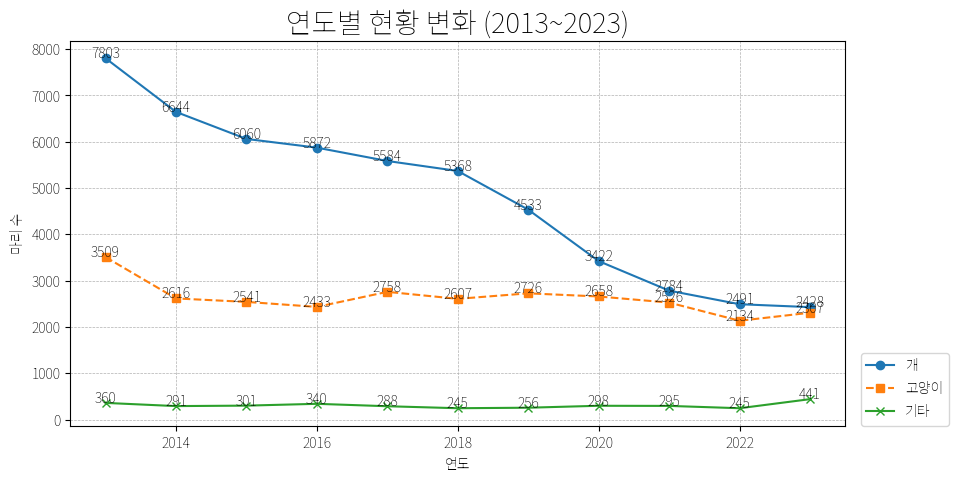

In [ ]:
import matplotlib.pyplot as plt
#한글폰트 설정
plt.rc('font', family = 'Noto Sans KR')
plt.rc('font', size = 10)
plt.rc('axes', unicode_minus = False)

years = df2.columns.astype(int)
dogs = df2.loc['개']
cats = df2.loc['고양이']
etc = df2.loc['기타']

plt.figure(figsize=(10,5))
plt.plot(years, dogs, marker='o', label='개')
plt.plot(years, cats, marker='s',ls='--',label='고양이')
plt.plot(years, etc, marker='x', label='기타')
plt.title('유기동물 연도별 현황(2013~2023)', fontsize=20)
plt.xlabel('연도')
plt.ylabel('마리 수')
plt.grid(True, lw=0.5, ls='--')
plt.legend(loc=(1.02,0))
for idx, d in enumerate(dogs):
    plt.text(years[idx],dogs[idx]+5,d, ha='center', size=10)
for idx, c in enumerate(cats):
    plt.text(years[idx],cats[idx]+5,c, ha='center', size=10)
for idx, e in enumerate(etc):
    plt.text(years[idx],etc[idx]+5,e, ha='center', size=10)
plt.show()

In [ ]:
#서울시동물병원정보(사업장명/상세영업상태/도로명주소/좌표)>>지도로 표기 가능?

In [ ]:
def getAddress():
    df = pd.read_csv('data/서울시 동물병원 인허가 정보.csv', encoding='ANSI')
    list = df[['관리번호','사업장명','도로명주소','상세영업상태명','좌표정보(X)','좌표정보(Y)']]
    return list

getAddress()
#>>지도출력까지 진행해보기


,관리번호,사업장명,도로명주소,상세영업상태명,좌표정보(X),좌표정보(Y)
0,305000001020250002,아이랑 동물병원,"서울특별시 동대문구 이문로35길 12, 상가 A동 101호 (이문동, 래미안라그란데...",정상,205249.265436,455308.651764
1,324000001020250002,포레온 동물병원,"서울특별시 강동구 양재대로 1360, 포레온스테이션5 2층 2029호 (둔촌동)",정상,212195.109947,447197.273287
2,323000001020250002,한수동물병원,"서울특별시 송파구 송이로 244, 1층 (문정동)",정상,211585.501242,442816.765898
3,322000001020250002,원성준영상의학과동물병원,"서울특별시 강남구 도곡로 167, 성우빌딩 2층 (역삼동)",정상,203285.044272,443285.630756
4,324000001020030001,두루동물병원,서울특별시 강동구 구천면로 498-1 (명일동),정상,213510.676245,449651.323227
...,...,...,...,...,...,...
2193,324000001020160001,사랑해동물병원,"서울특별시 강동구 고덕로 133, 212호 (암사동, 강동롯데캐슬퍼스트아파트)",폐업,212334.958464,450346.790652
2194,324000001020090003,해피랜드동물병원,NaN,폐업,NaN,NaN
2195,324000001020090004,성내동물병원,NaN,폐업,NaN,NaN
2196,324000001020090005,사랑해동물병원,NaN,폐업,212334.958464,450346.790652


In [ ]:
import json
import os
import folium

def createMap(list, address):
    list = df2
    address = '아이랑동물병원' #java input
    y =df2['좌표정보(Y)']
    x =df2['좌표정보(X)']
    location=(y, x)
    map = folium.Map(location, zoom_start=15, width='100%', height='100%')
    for vet in list:
        location=(vet['y'], vet['x'])
        text = f'{list["사업장명"]}<br>{list["상세영업상태명"]}<br>{list["도로명주소"]}'
        popup=folium.Popup(text, max_width=200)
        folium.Marker(
            location,
            popup,
            icon=folium.Icon(color='blue', icon='glyphicon-road')
        ).add_to(map)

    map.save(f'data/map/{address}.html')
    print(x,y)


createMap(df2, '아이랑동물병원')

ValueError: Location should consist of two numerical values, but 0       455308.651764
1       447197.273287
2       442816.765898
3       443285.630756
4       449651.323227
            ...      
2193    450346.790652
2194              NaN
2195              NaN
2196    450346.790652
2197    450617.923584
Name: 좌표정보(Y), Length: 2198, dtype: float64 of type <class 'pandas.core.series.Series'> is not convertible to float.

In [ ]:
#서울시반려동물통계

In [ ]:
seoul_pet = pd.read_excel('data/반려동물+유무+및+취득+경로_20251013153621.xlsx')
seoul_pet

c:\Users\AIPM\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,구분별(1),구분별(2),2024,2024.1,2024.2,2024.3,2024.4,2024.5,2024.6,2024.7,2024.8
0,구분별(1),구분별(2),반려동물 유무,반려동물 유무,반려동물 취득경로,반려동물 취득경로,반려동물 취득경로,반려동물 취득경로,반려동물 취득경로,반려동물 취득경로,반려동물 취득경로
1,구분별(1),구분별(2),있다,없다,"동물판매업소(애견판매업소, 동물병원 등)","친지, 친구 등 아는 사람을 통해 유상 입양","친지, 친구 등 아는 사람을 통해 무상 입양",인터넷을 통해 구입,유기동물 입양,원래 기르던 동물이 낳은 새끼,기타
2,서울시,소계,19.5,80.5,26.3,22.7,35.1,3.1,9.3,3.5,0
3,성별,남성,18.1,81.9,29.2,23.2,32.2,3,8.7,3.8,-
4,NaN,여성,23.5,76.5,20.2,21.7,41.4,3.3,10.5,2.8,0
...,...,...,...,...,...,...,...,...,...,...,...
59,NaN,강동구,14.9,85.1,20,16.2,30.1,2,27.7,4.1,-
60,직업분류,관리전문직,20.5,79.5,30.3,17.6,27.8,5.6,10.8,7.9,-
61,NaN,화이트칼라,20.9,79.1,27.6,25.6,33.2,3.4,8.2,1.9,-
62,NaN,블루칼라,17.9,82.1,24.3,21.7,37.6,2.2,10.9,3.3,-
